# Die vergessenen Pandemien: Was die Schweiz aus ihrer Vergangenheit lernen kann
 
Pandemien wie COVID-19 haben uns gezeigt, wie verletzlich moderne Gesellschaften trotz technologischem Fortschritt sein können. Doch die Geschichte kennt viele solcher Gesundheitskrisen – auch in der Schweiz.  
 
Dieses Projekt visualisiert historische Daten zu Pandemien und Sterblichkeit in der Schweiz, um zu zeigen:
- wie Krankheiten sich über Kantone verbreiteten,
- wie Todesraten sich entwickelten,
- und was wir daraus für zukünftige Krisen lernen können.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column, row
from bokeh.palettes import PuBu, BuPu
from bokeh.transform import dodge
from bokeh.models import (
    ColumnDataSource, HoverTool, Span, Range1d, LinearAxis, Label, LabelSet,
    PanTool, BoxZoomTool, WheelZoomTool, ResetTool, CrosshairTool,
    NumeralTickFormatter, Legend, Title, Select, RadioButtonGroup, CustomJS,
    DatetimeTickFormatter, BoxAnnotation
)


In [103]:
data_set1 = pd.read_excel("../Data/1_History_Pandemics.xlsx")
data_set2_mortality = pd.read_excel("../Data/2_All_cantons_1953-1958_Mortality.xlsx")
data_set2_incidence_weekly = pd.read_excel("../Data/2_Data_cantons_incidence_weekly_56_58_NEW.xlsx")
data_set2_population = pd.read_excel("../Data/2_Population_cantons.xlsx")
data_set3 = pd.read_excel("../Data/3_Todesursachen Schweiz ohne Alter 1876-2002.xlsx", header=None)

# Data Profiling with ydata_profiling

In [104]:
# Data Profiling dataset 1
profile = ProfileReport(data_set1, 
                        title="OUR DATASET", 
                        sort=None,
                        sensitive=False,
                        explorative=False)

# Create and display the report
# profile.to_notebook_iframe()    # Integrate into a Jupyter notebook
# profile.to_widgets()             # Integrate into a Jupyter notebook, compact
# profile.to_file("Dataset1_profiling.html")  # Save the report to a file
# profile

In [105]:
# Data Profiling
profile = ProfileReport(data_set2_mortality, 
                        title="OUR DATASET", 
                        sort=None,
                        sensitive=False,
                        explorative=False)

# Create and display the report
# profile.to_notebook_iframe()    # Integrate into a Jupyter notebook
# profile.to_widgets()             # Integrate into a Jupyter notebook, compact
# profile.to_file("data_set2_mortality_profiling.html")  # Save the report to a file
# profile

In [106]:
# Data Profiling
profile = ProfileReport(data_set2_incidence_weekly, 
                        title="OUR DATASET", 
                        sort=None,
                        sensitive=False,
                        explorative=False)

# Create and display the report
# profile.to_notebook_iframe()    # Integrate into a Jupyter notebook
# profile.to_widgets()             # Integrate into a Jupyter notebook, compact
# profile.to_file("data_set2_incidence_weekly_profiling.html")  # Save the report to a file
# profile

In [107]:
# Data Profiling
profile = ProfileReport(data_set2_population, 
                        title="OUR DATASET", 
                        sort=None,
                        sensitive=False,
                        explorative=False)

# Create and display the report
# profile.to_notebook_iframe()    # Integrate into a Jupyter notebook
# profile.to_widgets()             # Integrate into a Jupyter notebook, compact
# profile.to_file("data_set2_population.html")  # Save the report to a file
# profile

In [108]:
# Data Profiling
profile = ProfileReport(data_set3, 
                        title="OUR DATASET", 
                        sort=None,
                        sensitive=False,
                        explorative=False)

# Create and display the report
# profile.to_notebook_iframe()    # Integrate into a Jupyter notebook
# profile.to_widgets()             # Integrate into a Jupyter notebook, compact
# profile.to_file("data_set3_population.html")  # Save the report to a file
# profile

---
# Look at the datasets

## Dataset 1

In [109]:
data_set1.describe()

,Jahr,Todesfälle_Grippe_100000,Todesfälle_Covid_100000,TodesfälleGrippe,TodesfälleCOVID,Population,Überasterblichkeit_Alles,ÜberasterblichkeitPlus,ÜberasterblichkeitMinus
count,143.00000,140.000000,3.000000,140.00000,3.000000,1.430000e+02,141.000000,77.000000,68.000000
mean,1951.00000,18.172899,74.326929,767.00000,6431.666667,5.195008e+06,0.656738,3.740260,-2.873529
std,41.42463,48.962370,31.572219,1883.48357,2685.667391,1.715657e+06,5.842117,6.033792,2.543568
min,1880.00000,0.038532,46.104776,3.00000,4029.000000,2.840501e+06,-13.800000,0.000000,-13.800000
25%,1915.50000,3.034354,57.278424,155.25000,4982.000000,3.855200e+06,-2.100000,0.700000,-4.025000
50%,1951.00000,7.818421,68.452072,422.00000,5935.000000,4.717200e+06,0.300000,2.500000,-2.300000
75%,1986.50000,19.202038,88.438006,839.25000,7633.000000,6.504124e+06,2.800000,4.900000,-0.975000
max,2022.00000,554.049400,108.423939,21491.00000,9331.000000,8.738791e+06,49.300000,49.300000,0.000000


In [110]:
data_set1.head(10)

,Jahr,Todesfälle_Grippe_100000,Todesfälle_Covid_100000,TodesfälleGrippe,TodesfälleCOVID,Population,Überasterblichkeit_Alles,ÜberasterblichkeitPlus,ÜberasterblichkeitMinus
0,1880,3.766941,NaN,107.0,NaN,2840501,NaN,0.0,0.0
1,1881,2.358739,NaN,67.0,NaN,2840501,NaN,0.0,0.0
2,1882,3.191577,NaN,91.0,NaN,2851255,1.0,1.0,NaN
3,1883,2.762012,NaN,79.0,NaN,2860234,-4.6,NaN,-4.6
4,1884,1.880705,NaN,54.0,NaN,2871264,-1.0,NaN,-1.0
5,1885,2.115360,NaN,61.0,NaN,2883670,7.2,7.2,NaN
6,1886,2.109133,NaN,61.0,NaN,2892184,3.2,3.2,NaN
7,1887,1.929966,NaN,56.0,NaN,2901605,-0.8,NaN,-0.8
8,1888,2.610578,NaN,76.0,NaN,2911233,-2.7,NaN,-2.7
9,1889,1.813270,NaN,53.0,NaN,2922897,2.4,2.4,NaN


## Dataset 3

In [111]:
data_set3

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,T 14.1.1.4,Todesursachen nach Organerkrankungen 1876-2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jahr,Infektions- und parasitäre Krankheiten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Unbekannte Todesursachen,NaN,NaN,NaN,Gesamt-
4,NaN,"Pocken, Scharlach, Masern, Typhus, Diphtherie,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuberkulose,...,Schwanger-,Angeborene Säug-,NaN,Alters-,NaN,Arzt,Arzt,Total,NaN,total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,* Partielle Veränderung der Nomenklatur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,Quellen: Eidg. Statistisches Amt / Bundesamt f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
data_set3.head(10)

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,T 14.1.1.4,Todesursachen nach Organerkrankungen 1876-2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jahr,Infektions- und parasitäre Krankheiten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Unbekannte Todesursachen,NaN,NaN,NaN,Gesamt-
4,NaN,"Pocken, Scharlach, Masern, Typhus, Diphtherie,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuberkulose,...,Schwanger-,Angeborene Säug-,NaN,Alters-,NaN,Arzt,Arzt,Total,NaN,total
5,NaN,Total,Pocken,Schar-,Masern,"Typhus,",Diph-,Keuch-,NaN,Total,...,schaft u.,lingskrankheiten,NaN,schwäche,NaN,beige-,nicht bei-,NaN,NaN,NaN
6,NaN,NaN,NaN,lach 1),2),Para-,therie,husten,NaN,NaN,...,Geburt,Total,Früh-,NaN,NaN,zogen,gezogen,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,typhus 3),NaN,NaN,NaN,NaN,...,NaN,NaN,geburt 14),NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1876,3844,8,715,93,1335,1197,496,NaN,...,...,...,...,...,...,NaN,1604,16096,17700,NaN,66819


In [113]:
header_rows = data_set3.iloc[3:6].fillna(method='ffill', axis=1)
combined_headers = header_rows.apply(lambda x: ' | '.join(x.dropna().astype(str)), axis=0)

# Effektive Daten ab Zeile 10 (Index 9)
data = data_set3.iloc[9:].copy()
data.columns = combined_headers
data = data.reset_index(drop=True)

for col in data.columns:
    print(col)

Jahr
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Total
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Pocken
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Schar-
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Masern
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Typhus,
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Diph-
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Keuch-
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Keuch-
Infektions- und parasitäre Krankheiten | Tuberkulose | Total
Infektions- und parasitäre Krankheiten | Tuberkulose | Atmungso

/var/folders/2n/p_kvbcv55wb5z36gdx2rlmx00000gn/T/ipykernel_6328/933603028.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  header_rows = data_set3.iloc[3:6].fillna(method='ffill', axis=1)


In [114]:
data.to_csv("../Data/data_set3_cleaned.csv")

---
## Dataset 1. Pandemic Death Rates (Bar Chart)


In 2020, the COVID-19 pandemic disrupted life across the globe. In Switzerland, as in many countries, society paused, reeled, and eventually adapted. As the emergency fades, a question lingers:

> **Have we really learned from this crisis—or are we doomed to forget, again?**

This project invites you on a journey. A journey through 130 years of Swiss pandemic history, told through data: deaths, diseases, and resilience. We visualize key insights from historical records to better understand how pandemics shaped our past—and how they can guide our future.


### How Deadly Were Past Pandemics?
When people think of pandemics, COVID-19 is top of mind. But how does it compare to earlier pandemics?

To answer this, we looked at death rates from major pandemics in Switzerland from 1889 to 2020, measured per 100,000 people. The bar chart below reveals the toll of each crisis:



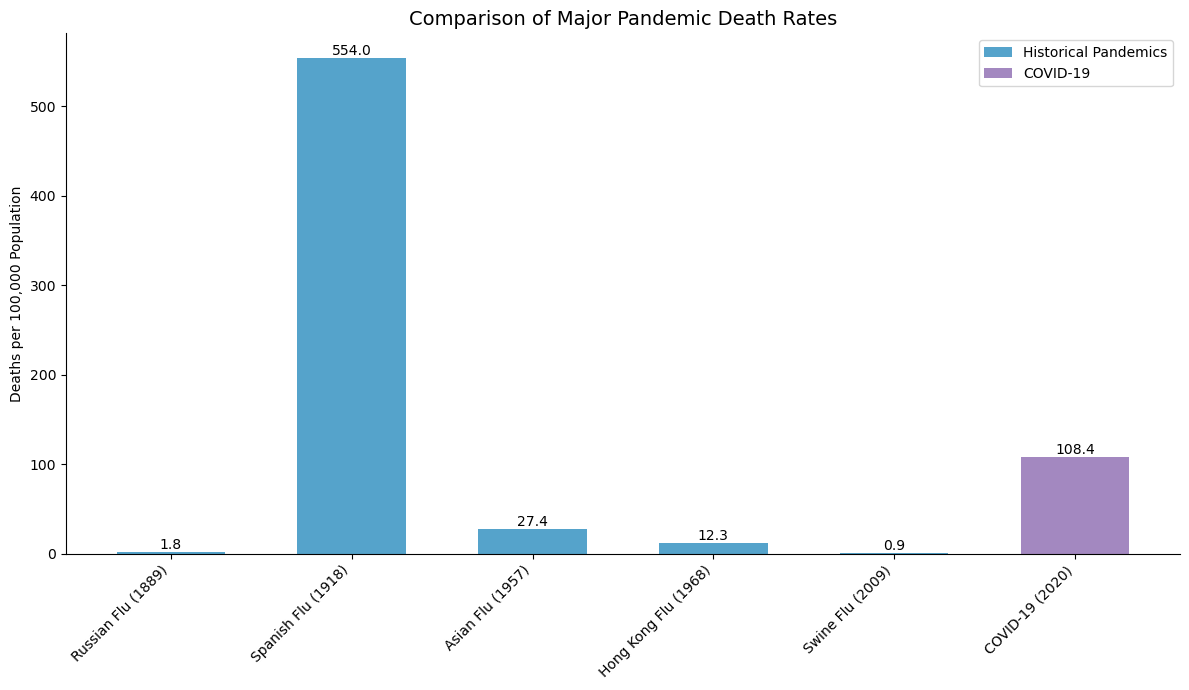

In [115]:
pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]  # Major pandemic years
pandemic_data = data_set1[data_set1['Jahr'].isin(pandemic_years)].copy()

# Erstelle eine neue Spalte für die Todesfälle pro Pandemie
pandemic_data['Todesfälle_100000'] = pandemic_data['Todesfälle_Grippe_100000'].fillna(0)
# Ersetze COVID-Werte für 2020
pandemic_data.loc[pandemic_data['Jahr'] == 2020, 'Todesfälle_100000'] = pandemic_data.loc[pandemic_data['Jahr'] == 2020, 'Todesfälle_Covid_100000'].fillna(0)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Set width of bars
bar_width = 0.6
index = np.arange(len(pandemic_years))

# Erstelle eine Farbliste (alle blau außer COVID in orange)
colors = [PuBu[6][1], PuBu[6][1], PuBu[6][1], PuBu[6][1], PuBu[6][1], BuPu[7][2]]


# Create the bars (nur ein Balken pro Pandemie)
bars = ax.bar(index, pandemic_data['Todesfälle_100000'], 
              bar_width, color=colors, alpha=0.8)

# Add labels, title
ax.set_ylabel('Deaths per 100,000 Population', fontsize=10)
ax.set_title('Comparison of Major Pandemic Death Rates', fontsize=14)

# Add pandemic names with years directly in the x-tick labels
pandemic_names_with_years = ["Russian Flu (1889)", "Spanish Flu (1918)", "Asian Flu (1957)", 
                           "Hong Kong Flu (1968)", "Swine Flu (2009)", "COVID-19 (2020)"]
ax.set_xticks(index)
ax.set_xticklabels(pandemic_names_with_years, rotation=45, ha='right')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}', 
                   xy=(bar.get_x() + bar.get_width() / 2, height), 
                   ha='center', va='bottom')

# Füge eine Legende hinzu
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=PuBu[6][1], alpha =0.8, label='Historical Pandemics'),
    Patch(facecolor=BuPu[7][2], alpha = 0.8, label='COVID-19')
]
ax.legend(handles=legend_elements, loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

### Key Findings:

- The 1918 Spanish Flu had by far the highest death rate in Swiss history—more than five times higher than COVID-19.
- Pandemics in 1957 (Asian Flu) and 1968 (Hong Kong Flu) caused significant but lesser mortality.
- The 2009 Swine Flu was comparatively mild in Switzerland.

>COVID-19 was not the deadliest pandemic in Swiss history. In fact, the Spanish Flu of 1918 remains unmatched in scale. But history shows: even ‘moderate’ pandemics can leave lasting scars.


---
## Dataset 1: Population and Pandemic Deaths Over Time

### Time, Population, and Mortality: The Bigger Picture
Pandemic impact doesn’t occur in isolation—it happens in the context of a growing society. To understand the broader picture, we plotted pandemic death rates alongside population growth over more than a century.

**Tip:** Hover over the lines in the chart to explore each year. You’ll see how many people lived in Switzerland, and how many died from influenza or COVID-19 during that time.

In [116]:
output_notebook()


pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]
pandemic_names = ["Russian Flu", "Spanish Flu", "Asian Flu", "Hong Kong Flu", "Swine Flu"]

# prepare data 
pandemic_data = data_set1.copy()
highlight_data = data_set1[data_set1['Jahr'].isin(pandemic_years)].copy()


source_main = ColumnDataSource(pandemic_data)
source_highlights = ColumnDataSource(highlight_data)


p = figure(
    title="Pandemic Mortality vs. Population Growth (1889-2020)",
    height=600,
    width=950,
    x_axis_label="Year",
    y_axis_label="Population",
    tools=""  
)


p.yaxis.formatter = NumeralTickFormatter(format="0,0")
p.y_range = Range1d(0, pandemic_data['Population'].max() * 1.1)


max_deaths = max(pandemic_data['Todesfälle_Grippe_100000'].max(), 
               pandemic_data['Todesfälle_Covid_100000'].max())
p.extra_y_ranges = {"deaths": Range1d(0, max_deaths * 1.1)}
p.add_layout(LinearAxis(y_range_name="deaths", axis_label="Deaths per 100,000 Population"), 'right')


population_line = p.line(
    x='Jahr', y='Population', source=source_main,
    line_width=3, line_dash='dashed', color='black',
    alpha=0.5, legend_label="Population"
)


flu_line = p.line(
    x='Jahr', y='Todesfälle_Grippe_100000', source=source_main,
    y_range_name='deaths', line_width=3, color=PuBu[7][0],
    alpha=0.7, legend_label="Influenza Deaths"
)


for year in pandemic_years:
    if year in pandemic_data['Jahr'].values:
        vline = Span(location=year, dimension='height', 
                   line_color='grey', line_dash='dashed', line_width=1)
        p.add_layout(vline)


flu_circles = p.circle(
    x='Jahr', y='Todesfälle_Grippe_100000', source=source_highlights,
    y_range_name='deaths', size=10, color=PuBu[7][0],
    line_color=PuBu[7][0], line_width=1, alpha = 0.8
)


# Tooltip for Crosshair
hover = HoverTool(
    tooltips=[
        ("Year", "@Jahr"),
        ("Population", "@Population{0,0}"),
        ("Influenza Deaths", "@{Todesfälle_Grippe_100000}{0.0} per 100k")
    ],
    renderers=[population_line],
    mode='vline',  
    line_policy='nearest'
)

# Create a properly defined CrosshairTool
crosshair = CrosshairTool(line_color="gray", line_alpha=0.5)

# In 

tools = [
    PanTool(),
    BoxZoomTool(),
    WheelZoomTool(),
    ResetTool(),
    crosshair,
    hover,
]
p.add_tools(*tools)

# Legend and styling
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0.7

p.title.text_font_size = '14pt'
p.title.align = 'center'
p.xaxis.axis_label_text_font_size = '10pt'
p.yaxis.axis_label_text_font_size = '10pt'

p.grid.grid_line_alpha = 0.3

show(p)

Loading BokehJS ...

>“A growing population does not automatically mean higher mortality—if health systems adapt. Still, sharp spikes in 1918 and 2020 show that even modern nations remain vulnerable when overwhelmed.”

### Key Findings:
- Switzerland's population grew from under 3 million in 1880 to over 8 million by 2022.
- Despite this growth, pandemic death rates spiked dramatically only in select years—especially in 1918 and 2020.
- Medical and public health advances appear to have helped reduce death rates in later pandemics.

Of particular interest to most: COVID-19. 

It is precisely from this current data that we can probably draw the most important insights. That is why it is also presented here individually and in more detail. The chart shows how many deaths from COVID-19 there have been in Switzerland each year.

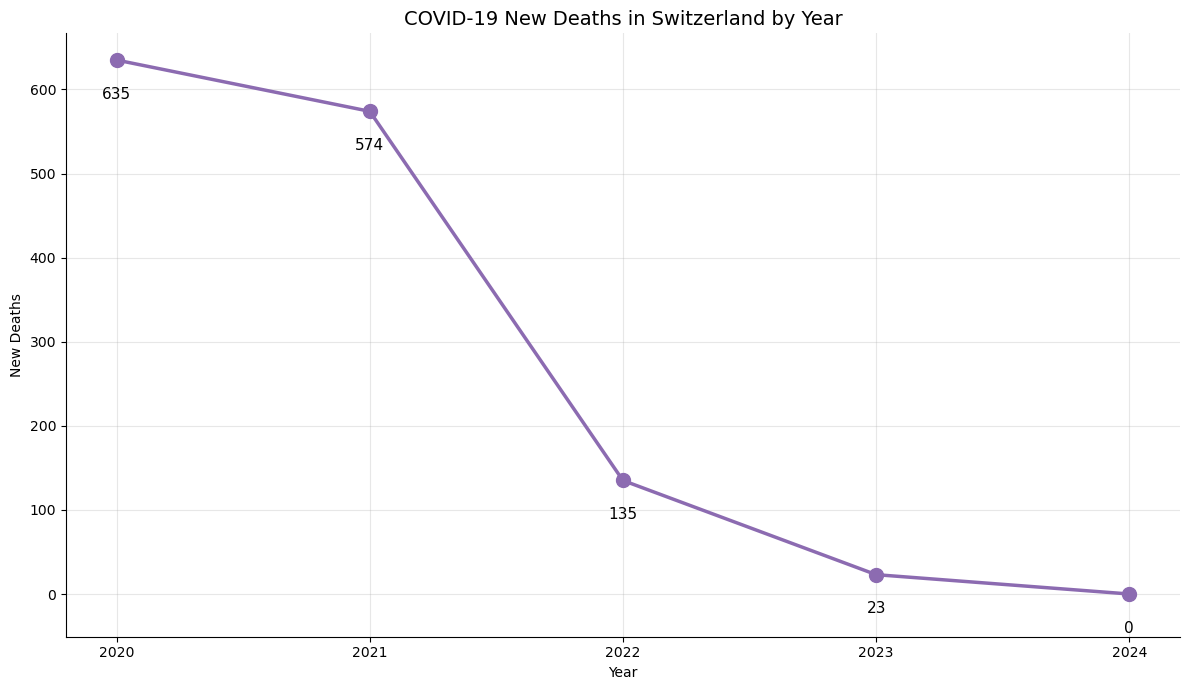

In [117]:
data_covid = pd.read_csv("../Data/full_data.csv")

# Filter for Switzerland
switzerland_data = data_covid[data_covid['location'] == 'Switzerland'].copy()
switzerland_data['date'] = pd.to_datetime(switzerland_data['date'])
switzerland_data['year'] = switzerland_data['date'].dt.year

# Get end-of-year totals for new_deaths instead of total_cases
yearly_data = switzerland_data.groupby('year').agg({'new_deaths': 'max'}).reset_index()

# --- Plot Design-Stil anpassen ---
fig, ax = plt.subplots(figsize=(12, 7))

# Linie mit Marker
ax.plot(yearly_data['year'], yearly_data['new_deaths'],
        marker='o', markersize=10, linewidth=2.5,
        color=BuPu[7][2])  

# Werte beschriften UNTER den Punkten
for x, y in zip(yearly_data['year'], yearly_data['new_deaths']):
    # Format the number with comma separators
    ax.text(x, y - (yearly_data['new_deaths'].max() * 0.05),
            f'{int(y):,}', ha='center', va='top', fontsize=11)

ax.set_title('COVID-19 New Deaths in Switzerland by Year', fontsize=14)
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('New Deaths', fontsize=10)

# Format x-axis to use integers only (no decimal places)
ax.xaxis.set_major_locator(plt.matplotlib.ticker.MaxNLocator(integer=True))

ax.grid(True, alpha=0.3)
ax.set_ylim(bottom=-yearly_data['new_deaths'].max() * 0.08,
            top=yearly_data['new_deaths'].max() * 1.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Layout justieren
plt.tight_layout()
plt.show()

---
## Dataset 1: Excess Mortality Over Time



### Excess Mortality Over Time
To understand the true cost of pandemics, we looked beyond reported causes of death. Sometimes, people die because of a pandemic, but not from the disease itself—indirect effects like delayed treatments, overwhelmed hospitals, or social disruptions can all lead to excess deaths.

This is where excess mortality becomes essential. It measures how many people died above or below what we would statistically expect in a normal year, based on historical trends.

**How to read the graph:**

- Each dot represents a year between 1880 and 2022.
- Purple dots mean more people died than expected → positive excess mortality.

    This often occurs during severe flu seasons, pandemics, heatwaves, or crises.

- Blue dots mean fewer people died than expected → negative excess mortality.

    This can reflect milder flu seasons, improved healthcare, or social measures like lockdowns reducing accidents.
    
- The gray line shows the trend over time.
- Vertical lines mark known pandemic years like 1918, 1957, and 2020.
- The horizontal dashed line at 0% represents the baseline: deaths were as expected that year.

In [118]:
output_notebook()

# Prepare the data
df = data_set1.copy()

# Drop rows where either 'Jahr' or 'Überasterblichkeit_Alles' is missing
df = df.dropna(subset=['Jahr', 'Überasterblichkeit_Alles'])

# Data subsets for coloring
df_pos = df[df['Überasterblichkeit_Alles'] > 0]
df_neg = df[df['Überasterblichkeit_Alles'] <= 0]

source_pos = ColumnDataSource(df_pos)
source_neg = ColumnDataSource(df_neg)


# Create the figure
p = figure(
    title="Excess Mortality in Switzerland (1880–2022)",
    height=600,
    width=950,
    x_axis_label="Year",
    y_axis_label="Excess Mortality (%)",
    tools="pan,box_zoom,reset,wheel_zoom,hover",
    tooltips=[
        ("Year", "@Jahr"),
        ("Excess Mortality", "@Überasterblichkeit_Alles{0.0}%")
    ]
)

# Line showing the trend
p.line('Jahr', 'Überasterblichkeit_Alles', source=df, line_width=3, color= PuBu[7][0], alpha= 0.7)

# Colored points
p.scatter(
    'Jahr', 'Überasterblichkeit_Alles', source=df,
    size=8, color='color', line_color='black', line_width=1
)

# Horizontal line at 0%
zero_line = Span(location=0, dimension='width', line_color='black', line_dash='dashed', line_width=2, line_alpha= 0.7 )
p.add_layout(zero_line)

# Mark pandemic years
pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]
for year in pandemic_years:
    if year in df['Jahr'].values:
        vline = Span(location=year, dimension='height', line_color='grey', line_dash='dotted', line_width=1)
        p.add_layout(vline)

# Styling
p.title.text_font_size = '14pt'
p.title.align = 'center'
p.y_range = Range1d(-15, 50)

p.grid.grid_line_alpha = 0.3


p.scatter(
    x='Jahr', y='Überasterblichkeit_Alles', source=source_pos,
    size=8, color=BuPu[7][2], line_color=BuPu[7][2], line_width=1, alpha = 0.8,  legend_label='Excess Mortality > 0'
)

p.scatter(
    x='Jahr', y='Überasterblichkeit_Alles', source=source_neg,
    size=8, color=PuBu[6][1], line_color=PuBu[6][1], line_width=1, alpha = 0.8, legend_label='Excess Mortality ≤ 0'
)

# Legend styling
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0.7
p.title.text_font_size = '14pt'
p.title.align = 'center'
p.xaxis.axis_label_text_font_size = '10pt'
p.yaxis.axis_label_text_font_size = '10pt'


# Show the plot
show(p)


Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : fill_color='color' [no close matches], hatch_color='color' [no close matches] {renderer: GlyphRenderer(id='p3394', ...)}


## Dataset 2

## The Invisible Peaks: How Influenza Deaths Hide Within Total Mortality (1953–1958)
When we think about causes of death, influenza often doesn’t come to mind first. Most people associate it with discomfort or seasonal sickness — not with mortality. Yet when we look closely at historical data, a different picture begins to emerge.

Between 1953 and 1958, monthly death records from Switzerland show that flu outbreaks leave a clear seasonal trace. While the total number of deaths remained relatively stable, flu-related deaths would suddenly spike in winter months — especially in early 1953, early 1956, and the winter of 1957/58.

These spikes are not random. They line up with documented influenza epidemics, including the well-known Asian Flu (H2N2), which began spreading worldwide in 1957. In Switzerland, this particular wave peaked in December 1957 to January 1958, causing a noticeable but temporary rise in flu deaths.

However, even at their highest, influenza deaths remained just a small fraction of total mortality. That’s why they’re often overlooked and influenza's impact tends to blend into the bigger picture.

Still, this matters. Even when it doesn’t dominate the statistics, influenza adds pressure to healthcare systems and contributes to seasonal death surges. These seasonal patterns show us that flu is not always deadly, but in certain years, it can be very serious — especially for older or vulnerable people.

**Key takeaways from the visualization below:**

- Flu death spikes are clearly visible in winters of 1953, 1956, and 1957/58.
- The 1957/58 peak matches the timing of the global Asian Flu pandemic (H2N2).
- Total mortality remains mostly stable, but seasonal fluctuations include hidden flu effects.
- Context matters: cold winters, aging populations, and coexisting illnesses all influence death patterns.

*Note:*

- All charts and data refer to Switzerland between 1953 and 1958.
- Data from September to December 1958 is incomplete. This analysis includes only the fully documented period from January 1953 to August 1958.


In [119]:
# Comparison of influenza deaths and general deaths (per canton and Switzerland) (until August 1958, due to missing data)
output_notebook()


# Normalize the parameter column
data_set2_mortality["Parameter"] = data_set2_mortality["Parameter"].str.strip().str.lower()
data_set2_mortality["Parameter"] = data_set2_mortality["Parameter"].replace({
    "deaths total": "deaths total",
    "total deaths": "deaths total",
    "total death": "deaths total"
})

# Convert month names to numbers
month_map = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4,
    'may': 5, 'june': 6, 'july': 7, 'august': 8,
    'september': 9, 'october': 10, 'november': 11, 'december': 12
}
data_set2_mortality["Month"] = data_set2_mortality["Month"].str.strip().str.lower().map(month_map)

# Extract influenza and total deaths for Switzerland (CH)
influenza_ch = data_set2_mortality[data_set2_mortality["Parameter"] == "deaths influenza"][["Year", "Month", "CH"]]
total_ch = data_set2_mortality[data_set2_mortality["Parameter"] == "deaths total"][["Year", "Month", "CH"]]

# Merge by year and month
comparison_df = influenza_ch.copy()
comparison_df = comparison_df.rename(columns={"CH": "Influenza_Deaths"})
comparison_df["Total_Deaths"] = total_ch["CH"].values

# Construct date column
comparison_df["Date"] = pd.to_datetime(dict(year=comparison_df["Year"], month=comparison_df["Month"], day=1))

# Keep only data until August 1958
comparison_df = comparison_df[(comparison_df["Year"] < 1958) | ((comparison_df["Year"] == 1958) & (comparison_df["Month"] <= 8))]

source = ColumnDataSource(comparison_df)

# === New plot as area chart ===
p = figure(title="Comparison: Monthly Influenza Deaths vs. Total Deaths in Switzerland (1953–1958)",
           x_axis_type="datetime",
           width=950, height=550,
           x_axis_label="Date", y_axis_label="Number of Deaths",
           tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Area for total deaths (background)
p.varea(x='Date', y1=0, y2='Total_Deaths', source=source,
        fill_color=PuBu[7][0], fill_alpha=0.5, legend_label="Total Deaths")

# Area for influenza deaths (foreground)
p.varea(x='Date', y1=0, y2='Influenza_Deaths', source=source,
        fill_color=BuPu[7][2], fill_alpha=0.8, legend_label="Influenza Deaths")

# Invisible lines for hover tool
p.line(x='Date', y='Influenza_Deaths', source=source,
       line_color=BuPu[7][3], line_alpha=0.0, line_width=5)

p.line(x='Date', y='Total_Deaths', source=source,
       line_color=PuBu[7][2], line_alpha=0.0, line_width=5)

# Configure hover tool
hover = p.select_one(HoverTool)
hover.tooltips = [
    ("Date", "@Date{%Y-%m}"),
    ("Influenza Deaths", "@Influenza_Deaths{0,0}"),
    ("Total Deaths", "@Total_Deaths{0,0}")
]
hover.formatters = {'@Date': 'datetime'}
hover.mode = 'vline'

# Styling
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0.7
p.title.text_font_size = '14pt'
p.title.align = 'center'
p.xaxis.axis_label_text_font_size = '10pt'
p.yaxis.axis_label_text_font_size = '10pt'

# Show plot
show(p)

Loading BokehJS ...

The plot shows how flu deaths (purple) compare to total deaths (blue) over time. You can see that flu rarely dominates, but it spikes sharply in some winters.

In most months, flu caused less than 1% of all deaths. But during major outbreaks, such as winter 1957/58, flu accounted for over 10% of monthly deaths.

➤ This tells us: Even if influenza doesn’t always cause mass mortality, it can play a big role in certain years. That’s why flu prevention, vaccination, and awareness remain important — especially in colder months.

### When Flu Deaths Break Through the Noise
This next chart shows how big of a share influenza had in the total number of deaths each month in Switzerland between 1953 and 1958.

In [120]:
output_notebook()

df_mortality_2 = data_set2_mortality.copy()

# Normalize the parameter column
df_mortality_2["Parameter"] = df_mortality_2["Parameter"].str.strip().str.lower()
df_mortality_2["Parameter"] = df_mortality_2["Parameter"].replace({
    "deaths total": "deaths total",
    "total deaths": "deaths total",
    "total death": "deaths total"
})

# Convert month names to numbers
month_map = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4,
    'may': 5, 'june': 6, 'july': 7, 'august': 8,
    'september': 9, 'october': 10, 'november': 11, 'december': 12
}
df_mortality_2["Month"] = df_mortality_2["Month"].astype(str).str.strip().str.lower().map(month_map)

# Extract influenza and total deaths for Switzerland (CH)
influenza_ch_2 = df_mortality_2[df_mortality_2["Parameter"] == "deaths influenza"][["Year", "Month", "CH"]]
total_ch_2 = df_mortality_2[df_mortality_2["Parameter"] == "deaths total"][["Year", "Month", "CH"]]

# Merge by year and month
comparison_df_2 = influenza_ch.copy()
comparison_df_2 = comparison_df_2.rename(columns={"CH": "Influenza_Deaths"})
comparison_df_2["Total_Deaths"] = total_ch["CH"].values

# Construct date column
comparison_df_2["Date"] = pd.to_datetime(dict(year=comparison_df_2["Year"], month=comparison_df_2["Month"], day=1))

# Keep only data until August 1958
comparison_df_2 = comparison_df_2[(comparison_df_2["Year"] < 1958) | ((comparison_df_2["Year"] == 1958) & (comparison_df_2["Month"] <= 8))]
# Calculate influenza share
comparison_df_2["Influenza_Share"] = comparison_df_2["Influenza_Deaths"] / comparison_df_2["Total_Deaths"] * 100
source = ColumnDataSource(comparison_df_2)

# Plot setup
p = figure(title="Influenza Deaths as a Share of Total Deaths in Switzerland (1953–1958)",
           x_axis_type="datetime", width=950, height=500,
           x_axis_label="Date", y_axis_label="Influenza Share (%)",
           tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Influenza share line with transparency
line = p.line(x='Date', y='Influenza_Share', source=source,
              line_width=3, color=BuPu[7][2], line_alpha=0.6,
              legend_label="Influenza Share (%)")

# Small monthly dots
dots = p.scatter(x='Date', y='Influenza_Share', source=source,
                 size=5, color=BuPu[7][2], legend_label="Monthly Data Point")

# === Hover tool ===
hover = p.select_one(HoverTool)
hover.tooltips = [
    ("Date", "@Date{%F}"),
    ("Influenza Share", "@Influenza_Share{0.00}%")
]
hover.formatters = {'@Date': 'datetime'}

# Horizontal 5% reference line
ref_line = Span(location=5, dimension='width', line_color='gray',
                line_dash='dashed', line_width=2)
p.add_layout(ref_line)

# 5% threshold label
label = Label(x=comparison_df["Date"].iloc[5], y=5.3,
              text="5% Threshold", text_font_size="10pt", text_color="gray")
p.add_layout(label)

# Winter shading
for year in range(1953, 1958):
    winter_box = BoxAnnotation(left=pd.Timestamp(f"{year}-12-01"),
                                right=pd.Timestamp(f"{year+1}-03-01"),
                                fill_alpha=0.1, fill_color='lightblue')
    p.add_layout(winter_box)

# First Asian flu case (Sep 9, 1957)
first_case_date = pd.Timestamp("1957-09-09")
first_case_month_val = comparison_df_2.loc[comparison_df_2["Date"] == pd.Timestamp("1957-09-01"), "Influenza_Share"].values[0]

# Asian flu dot
asian_source = ColumnDataSource(data=dict(
    Date=[first_case_date],
    Influenza_Share=[first_case_month_val]
))
asian_dot = p.scatter(x='Date', y='Influenza_Share', source=asian_source,
                      size=10, color=BuPu[7][0], legend_label="First case: Asian Flu (Sep 9, 1957)")

# Hover just for that dot
p.add_tools(HoverTool(
    tooltips=[
        ("Date", "@Date{%F}"),
        ("Influenza Share", "@Influenza_Share{0.00}%"),
        ("Note", "First case: Asian Flu")
    ],
    formatters={'@Date': 'datetime'},
    mode='mouse',
    renderers=[asian_dot]
))

# Shade from first case to August 1958
shading = BoxAnnotation(left=first_case_date,
                        right=pd.Timestamp("1958-08-31"),
                        fill_alpha=0.15, fill_color=BuPu[7][0])
p.add_layout(shading)

# Final styling
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0.7
p.title.text_font_size = '14pt'
p.title.align = 'center'
p.xaxis.axis_label_text_font_size = '10pt'
p.yaxis.axis_label_text_font_size = '10pt'

show(p)

Loading BokehJS ...

- The line represents the flu death percentage each month — how much of all deaths that month were caused by influenza. 
- The dashed line marks a 5% threshold — above that, flu becomes a noticeable contributor to overall mortality.
- Each dot is a data point, and the dark purple one marks the first case of the Asian Flu in Switzerland (September 9, 1957).

In most months, flu deaths were well below 1–2% of all deaths — almost invisible in the bigger picture. But in four major winter waves — 1953, 1955, 1956, and 1957/58 — flu deaths spiked above 5%, reaching over 10% during peak months. The 1957/58 wave is the most dramatic, peaking shortly after the first known case of the Asian Flu (H2N2) — a pandemic that swept across the globe.

➤ This plot makes the invisible visible: flu may not always stand out, but it can still shift mortality trends sharply and suddenly. This view helps us understand influenza not as a constant killer, but as a seasonal and sometimes explosive threat.


## The 1957 Flu Pandemic in Switzerland: A Sharp Spike in Infections, But Mortality Stayed Low
In the fall of 1957, a new influenza strain — H2N2, also known as the Asian Flu — reached Switzerland. By October, health officials were recording over 30,000 flu cases per week, as shown in the first chart below. This was an unprecedented surge.

However, something interesting happened: deaths didn’t rise as dramatically as expected. While cases skyrocketed, monthly flu deaths peaked at fewer than 500 — high, but relatively small considering the size of the outbreak.

Why were there so many infections, but relatively few deaths?

- Lower severity: H2N2 spread rapidly, but caused fewer severe cases and deaths compared to earlier pandemics.
- Younger population: Switzerland’s population in the 1950s was younger, meaning fewer high-risk elderly people.
- Antibiotics: These were more widely available to treat deadly complications like pneumonia.
- Better preparedness: Hospitals and health systems had improved significantly since earlier pandemics.
- Vaccination: Some early flu vaccines were already in use, helping to reduce severity, even if they didn’t prevent all infections.

**Result:** A massive wave of infection, but mortality stayed lower than in earlier pandemics.


In [122]:
# Filter weekly CH influenza cases from full dataset (no year filter)
weekly_ch = data_set2_incidence_weekly[data_set2_incidence_weekly["Parameter"] == "Cases Influenza"]
weekly_ch = weekly_ch[["StartReportingPeriod", "CH"]].rename(columns={"StartReportingPeriod": "Date", "CH": "Weekly_Cases"})
weekly_ch["Date"] = pd.to_datetime(weekly_ch["Date"])
weekly_ch["Week_Year"] = weekly_ch["Date"].dt.strftime("%d %b %Y")

# Create ColumnDataSource
weekly_source = ColumnDataSource(weekly_ch)

# Plot weekly cases
p_weekly = figure(title="Weekly Influenza Cases in Switzerland (1956–1958)",
                  x_axis_type="datetime", width=900, height=400,
                  x_axis_label="Year", y_axis_label="Weekly Cases",
                  tools="pan,wheel_zoom,box_zoom,reset,hover,save")

p_weekly.line(x='Date', y='Weekly_Cases', source=weekly_source,
              line_width=2.5, color=PuBu[7][0], alpha=0.7, legend_label="Weekly Cases")

# Hover tool
hover_weekly = p_weekly.select_one(HoverTool)
hover_weekly.tooltips = [
    ("Week", "@Week_Year"),
    ("Cases", "@Weekly_Cases{0,0}")
]
hover_weekly.formatters = {'@Date': 'datetime'}
hover_weekly.mode = 'vline'

# Axis formatting
p_weekly.xaxis.formatter = DatetimeTickFormatter(years="%Y", months="%b %Y")
p_weekly.yaxis.formatter = NumeralTickFormatter(format="0,0")
p_weekly.legend.location = "top_left"
p_weekly.legend.click_policy = "hide"
p_weekly.legend.background_fill_alpha = 0.7
p_weekly.title.text_font_size = '14pt'
p_weekly.title.align = 'center'
p_weekly.xaxis.axis_label_text_font_size = '10pt'
p_weekly.yaxis.axis_label_text_font_size = '10pt'

# Show plot
show(p_weekly)

The final months of 1957 show a dramatic spike in reported flu cases — far higher than any previous year in this dataset. It clearly marks the arrival and spread of the Asian Flu.

In [123]:
output_notebook()

# --- Prepare monthly influenza cases ---
cases_df = data_set2_incidence_weekly.copy()
cases_df = cases_df[cases_df["Parameter"] == "Cases Influenza"]
cases_df["Date"] = pd.to_datetime(cases_df["StartReportingPeriod"])
cases_df["MonthStart"] = cases_df["Date"].values.astype("datetime64[M]")
monthly_cases = cases_df.groupby("MonthStart")["CH"].sum().reset_index().rename(
    columns={"MonthStart": "Date", "CH": "Monthly_Cases"}
)

# --- Prepare monthly influenza deaths ---
deaths_df = data_set2_mortality.copy()
deaths_df["Parameter"] = deaths_df["Parameter"].str.strip().str.lower()
deaths_df = deaths_df[deaths_df["Parameter"] == "deaths influenza"]
deaths_df["Month"] = pd.to_numeric(deaths_df["Month"], errors="coerce")
deaths_df["Date"] = pd.to_datetime(dict(year=deaths_df["Year"], month=deaths_df["Month"], day=1))
deaths_df["Month_Name"] = deaths_df["Month"].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Group by date for monthly deaths (in case multiple values per month)
monthly_deaths = deaths_df.groupby("Date")["CH"].sum().reset_index().rename(columns={"CH": "Monthly_Deaths"})

# --- Filter to 1957–1958 ---
monthly_cases = monthly_cases[(monthly_cases["Date"].dt.year >= 1957) & (monthly_cases["Date"].dt.year <= 1958)]
monthly_deaths = monthly_deaths[(monthly_deaths["Date"].dt.year >= 1957) & (monthly_deaths["Date"].dt.year <= 1958)]

# --- Merge cases and deaths for plotting ---
merged = pd.merge(monthly_cases, monthly_deaths, on="Date", how="outer").fillna(0).sort_values("Date")
merged["Month_Year"] = merged["Date"].dt.strftime("%B %Y")
source = ColumnDataSource(merged)

# --- Plot ---
p = figure(title="Monthly Influenza Cases and Deaths in Switzerland (1957–1958)",
           x_axis_type="datetime", width=900, height=450,
           x_axis_label="Year", y_axis_label="Count",
           tools="pan,wheel_zoom,box_zoom,reset,hover,save")

p.line(x='Date', y='Monthly_Cases', source=source,
       line_width=3, color=PuBu[7][0], alpha=0.7, legend_label="Monthly Cases")

p.scatter(x='Date', y='Monthly_Deaths', source=source,
          size=8, color=BuPu[7][2], alpha=0.8, legend_label="Monthly Influenza Deaths")

# --- Hover ---
hover = p.select_one(HoverTool)
hover.tooltips = [
    ("Month", "@Month_Year"),
    ("Monthly Cases", "@Monthly_Cases{0,0}"),
    ("Monthly Deaths", "@Monthly_Deaths{0,0}")
]
hover.formatters = {'@Date': 'datetime'}
hover.mode = 'vline'

# --- Format Axes and Legend ---
p.xaxis.formatter = DatetimeTickFormatter(years="%Y")
p.yaxis.formatter = NumeralTickFormatter(format="0,0")
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0.7
p.title.text_font_size = '14pt'
p.title.align = 'center'
p.xaxis.axis_label_text_font_size = '10pt'
p.yaxis.axis_label_text_font_size = '10pt'

# --- Show plot ---
show(p)

Loading BokehJS ...

This comparison makes the gap visible: while infections exploded, deaths remained relatively moderate. The purple dots (deaths) stay low, even during the peak of the blue line (cases).

**Why this matters:**

This example illustrates that not all flu outbreaks are equally deadly. The scale of infection doesn’t always predict the scale of death. But the strain on healthcare systems, the risk to vulnerable people, and the potential for rapid spread all remain serious concerns.

➤ Lesson: A pandemic doesn’t have to be "high-fatality" to be high-impact.

**Sources: Understanding the 1957 Influenza Pandemic**

**1. CDC – Pandemic Influenza (Historical Context)**

These official resources from the Centers for Disease Control and Prevention (CDC) provide an overview of past influenza pandemics — including the 1957 H2N2 "Asian Flu" — as well as basic facts about pandemic influenza viruses, their origins, and public health impact.
While the focus is primarily on the United States, the virological and epidemiological information helps contextualize the virus’s behavior and spread globally — including its arrival and effects in Switzerland.

➤[CDC Pandemic Overview (1957–1958)](https://archive.cdc.gov/www_cdc_gov/flu/pandemic-resources/1957-1958-pandemic.html) 

➤[CDC Pandemic Flu Basics](https://www.cdc.gov/pandemic-flu/basics/index.html)

➤[CDC Pandemic Flu Portal](https://www.cdc.gov/pandemic-flu/index.html)

➤[Timeline of Avian Influenza (1880–1959)](https://www.cdc.gov/bird-flu/avian-timeline/1880-1959.html)


**2. WHO – 1957–1958 Influenza Pandemic in the USSR**

This historical report, published by the World Health Organization, documents the 1957 H2N2 “Asian Flu” pandemic in the USSR. While the report focuses on the Soviet Union, it offers important global context and insights into how the virus behaved. 

➤[WHO: The 1957 Influenza Pandemic in the USSR (Zhdanov, 1959)](https://iris.who.int/bitstream/handle/10665/265339/PMC2537752.pdf?sequence=1)


**3. Demographics and Age Structure in 1950s Switzerland**

These data from the Swiss Federal Statistical Office (BFS) show that Switzerland had a relatively young population structure in the early 1950s. This likely contributed to lower overall mortality during the 1957 pandemic, as younger populations were less vulnerable to severe outcomes.

The NCBI report supports this, noting that age distribution plays a key role in pandemic impact, with risk varying across age groups in each major outbreak.

➤[BFS – Swiss Population Structure, 1950](https://www.bfs.admin.ch/asset/de/27225422)

➤[NCBI – The Story of Influenza](https://www.ncbi.nlm.nih.gov/books/NBK22148/)


**4. Better Medical Care & Antibiotics**

Studies show that many deaths during past pandemics — especially in 1918 and partly in 1957 — were caused by bacterial pneumonia, not the virus itself. By the 1950s, antibiotics were available, likely helping to reduce deaths in countries like Switzerland.

➤ [CDC – Bacterial Pneumonia & Influenza Planning](https://wwwnc.cdc.gov/eid/article/14/8/07-0751_article)

➤ [NCBI – Bacterial Pneumonia in Pandemic Influenza](https://pmc.ncbi.nlm.nih.gov/articles/PMC2599911/)


**5. WHO – Vaccination and Influenza Prevention**

The World Health Organization (WHO) outlines the critical role of vaccines in reducing illness and death from influenza and other infectious diseases. 

➤ [WHO – Vaccines and Immunization](https://www.who.int/europe/health-topics/vaccines-and-immunization#tab=tab_1)

➤ [WHO – History of Influenza Vaccination](https://www.who.int/news-room/spotlight/history-of-vaccination/history-of-influenza-vaccination) 

## Dataset 3

### Long-Term Shifts in Causes of Death in Switzerland (1876–2002)
As we return from our data journey, we zoom out to see the bigger picture. The history of pandemics is only one thread in a much broader transformation:
How the causes of death in Switzerland have changed over nearly 150 years.

**The Decline of Infectious Diseases**
In the late 19th and early 20th centuries, infectious diseases such as tuberculosis, measles, diphtheria, scarlet fever, and whooping cough were leading causes of death in Switzerland.

- Several key developments contributed to their decline:

- Public sanitation and clean water infrastructure drastically reduced the spread of waterborne and respiratory diseases.

- Widespread vaccination campaigns targeted diseases like smallpox, measles, and diphtheria, dramatically lowering incidence and mortality.

- The discovery and use of antibiotics, starting in the 1940s, enabled effective treatment of bacterial infections that had once been fatal.

In the 19th century, tuberculosis alone accounted for a major share of deaths in cities like Bern.

*Source: PMC article on tuberculosis mortality in Bern*

In [124]:
output_notebook()

# Vorbereitung
df = data.copy()
df = df.loc[:, ~df.columns.duplicated()]

# Spaltenauswahl: Jahr + Krankheiten
df['Year'] = pd.to_numeric(df['Jahr'], errors='coerce')

# Wähle Krankheitsgruppen
cols = [
    "Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Total",
    "Atmungsorgane | Total | Aids",  # Diese musst du ggf. anpassen
    "Neubildungen | Total | chitis"  # Diese auch ggf. anpassen
]

# Umbenennen für bessere Lesbarkeit
col_map = {
    cols[0]: "Infectious Diseases",
    cols[1]: "Respiratory Diseases",
    cols[2]: "Neoplasms"
}

df_subset = df[["Year"] + cols].dropna()
for col in cols:
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')
df_subset[cols] = df_subset[cols].clip(lower=0)

# Datenquelle
source = ColumnDataSource(df_subset)

# Figure
p = figure(title="Major Causes of Death in Switzerland (Tooltip only on Respiratory Diseases)",
           x_axis_label="Year", y_axis_label="Deaths",
           width=950, height=550, tools="")

# Linien zeichnen & speichern
colors = (PuBu[6][1], PuBu[7][0], BuPu[7][2])
renderers = {}

for i, col in enumerate(cols):
    readable = col_map[col]
    line = p.line(x='Year', y=col, source=source,
                  line_width=3 if readable == "Respiratory Diseases" else 2,
                  color=colors[i],
                  alpha=0.7 if readable == "Respiratory Diseases" else 0.7,
                  legend_label=readable)
    renderers[readable] = line

hover = HoverTool(
    tooltips=[
        ("Year", "@Year"),
        ("Respiratory Deaths", f"@{{{cols[1]}}}{{0,0}}"),
        ("Infectious Deaths", f"@{{{cols[0]}}}{{0,0}}"),
        ("Neoplasms Deaths", f"@{{{cols[2]}}}{{0,0}}")
    ],
    renderers=[renderers["Respiratory Diseases"]],
    mode='vline'
)

p.add_tools(hover)

# Styling
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0.7
p.title.text_font_size = '14pt'
p.title.align = 'center'
p.xaxis.axis_label_text_font_size = '10pt'
p.yaxis.axis_label_text_font_size = '10pt'

show(p)


Loading BokehJS ...

### A Direct Comparison Across Time
This visual offers a unique opportunity:
It lets you freely compare any two years in Swiss mortality history—side by side.

In the example shown (1876 vs. 2004), the differences are striking:

- Infectious diseases, once dominant, had almost disappeared by 2004.

- Meanwhile, cancers and respiratory diseases had become leading causes of death.

    The chart is interactive: simply select two years, and watch how the causes shift.
    It invites you to explore your own questions—whether you're interested in the long-term decline of epidemics, the rise of chronic illnesses, or the effects of public health interventions.

This comparison isn’t just about numbers.
It makes visible how our medical history, environment, and behaviors have fundamentally changed what it means to get sick—and what it means to die.



In [125]:
df = data.copy()
df = df.loc[:, ~df.columns.duplicated()]
df['Year'] = pd.to_numeric(df['Jahr'], errors='coerce')

cols = [
    "Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Total",
    "Atmungsorgane | Total | Aids",
    "Neubildungen | Total | chitis"
]

col_map = {
    cols[0]: "Infectious Diseases",
    cols[1]: "Respiratory Diseases",
    cols[2]: "Neoplasms"
}

df = df.dropna(subset=["Year"] + cols)
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[cols] = df[cols].clip(lower=0)

years = sorted(df["Year"].dropna().unique().astype(int))


year_a = years[0]
year_b = years[-1]

def get_comparison(year1, year2):
    row1 = df[df['Year'] == year1][cols].iloc[0]
    row2 = df[df['Year'] == year2][cols].iloc[0]
    return pd.DataFrame({
        'Cause': [col_map[c] for c in cols],
        'Year A': row1.values,
        'Year B': row2.values
    })

comparison_df = get_comparison(year_a, year_b)
source = ColumnDataSource(comparison_df)

# Plot
p = figure(y_range=comparison_df['Cause'], height=400, width=800,
           title=f"Causes of Death: {year_a} vs {year_b}",
           x_axis_label="Number of Deaths", toolbar_location=None)

p.hbar(y=dodge('Cause', -0.2, range=p.y_range), right='Year A', height=0.35,
       source=source, color=PuBu[6][1], alpha=0.8, legend_label=str(year_a))

p.hbar(y=dodge('Cause',  0.2, range=p.y_range), right='Year B', height=0.35,
       source=source, color=BuPu[7][2], alpha=0.8, legend_label=str(year_b))

# Dropdowns
select_a = Select(title="Select Year A", value=str(year_a), options=[str(y) for y in years])
select_b = Select(title="Select Year B", value=str(year_b), options=[str(y) for y in years])


js_code = """
    const ya = parseInt(select_a.value);
    const yb = parseInt(select_b.value);

    const causes = ["Infectious Diseases", "Respiratory Diseases", "Neoplasms"];
    const cols = [
        "Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Total",
        "Atmungsorgane | Total | Aids",
        "Neubildungen | Total | chitis"
    ];

    const new_data = {Cause: causes, "Year A": [], "Year B": []};

    for (let i = 0; i < cols.length; i++) {
        let col = cols[i];
        let index_a = df["Year"].indexOf(ya);
        let index_b = df["Year"].indexOf(yb);
        new_data["Year A"].push(df[col][index_a]);
        new_data["Year B"].push(df[col][index_b]);
    }

    source.data = new_data;
    p.title.text = `Causes of Death: ${ya} vs ${yb}`;
    p.legend.items[0].label = {value: String(ya)};
    p.legend.items[1].label = {value: String(yb)};
    source.change.emit();
"""

callback = CustomJS(args=dict(source=source, df=df.to_dict(orient='list'),
                              select_a=select_a, select_b=select_b, p=p),
                    code=js_code)

# Dropdowns and callback setup
select_a.js_on_change("value", callback)
select_b.js_on_change("value", callback)

# styling

p.title.text_font_size = '14pt'
p.title.align = 'center'

p.xaxis.axis_label_text_font_size = '10pt'
p.yaxis.axis_label_text_font_size = '10pt'
show(column(row(select_a, select_b), p))




### Breaking Down Epidemics: The Disappearance of Specific Infectious Diseases

To go even deeper into the story of public health progress, we analyzed the **subgroups of infectious diseases** individually.
Instead of treating infectious deaths as a single category, this visualization breaks them down into their historical components:

* **Smallpox**
* **Measles**
* **Scarlet fever**
* **Diphtheria**
* **Typhus**
* **Whooping cough**

These diseases once claimed thousands of lives every year—especially among children. In the late 1800s and early 1900s, they were among the most feared causes of death in Switzerland.

But over time, something remarkable happened.

* One after another, these lines drop toward zero.
* By the end of the 20th century, most of these diseases had effectively disappeared from the mortality statistics.

> The thick gray line at the top of the chart shows the total deaths from infectious diseases.
> The colored lines underneath it represent each subgroup—declining at different speeds.

This chart does more than show death counts.
It visualizes the impact of **vaccines**, **antibiotics**, **public health systems**, and **collective behavior**.
It is, in a sense, a portrait of one of modern medicine’s greatest achievements:

---

**Sources on the Decline of Specific Infectious Diseases in Switzerland**

 1. **Historical Disease Burden in Switzerland**

* **Swiss Federal Statistical Office (BFS)**
  Die offiziellen Todesursachenstatistiken zeigen die rückläufige Entwicklung von Krankheiten wie Masern, Keuchhusten, Diphtherie etc. ab dem 20. Jahrhundert.
  ➤ [BFS – Causes of Death Statistics](https://www.bfs.admin.ch/bfs/en/home/statistics/health/state-of-health/mortality-causes-death.html)

2. **The Role of Vaccination**

* **European Centre for Disease Prevention and Control (ECDC)** – Impfprogramme in Europa haben Krankheiten wie Diphtherie, Keuchhusten und Masern stark reduziert.
  ➤ [ECDC – Vaccine-preventable diseases](https://www.ecdc.europa.eu/en/immunisation-vaccine-preventable-diseases)

* **World Health Organization (WHO)** – Success stories of vaccination in Europe, incl. measles, diphtheria, smallpox.
  ➤ [WHO – Immunization in the European Region](https://www.who.int/europe/health-topics/vaccines-and-immunization)

3. **Disease Elimination in Switzerland**

* **Smallpox** was officially eradicated globally in 1980, but Switzerland had already stopped routine vaccination in 1972.
  ➤ [WHO Smallpox Eradication Timeline](https://www.who.int/news-room/fact-sheets/detail/smallpox)

* **Diphtheria, Scarlet fever, Whooping cough (pertussis)**: sharp declines after vaccine introduction in mid-20th century.

> For example, in 1945, whooping cough caused over 1,000 deaths in Switzerland. Today, the number is close to zero (source: BFS).

4. **Academic Literature**

* **Staub K, Rühli FJ, Woitek U, Pfister C.**
  *Historical mortality data for Switzerland 1876–2015.*
  This paper provides clean historical cause-of-death data and is frequently cited.
  ➤ [PMID: 30318199](https://pubmed.ncbi.nlm.nih.gov/30318199/)

* **Global Burden of Disease Project** (Institute for Health Metrics and Evaluation):
  Offers data visualizations showing long-term disease shifts.
  ➤ [GBD Data Explorer](https://vizhub.healthdata.org/gbd-results/)




In [126]:
# --- Daten vorbereiten ---
df = data.copy()
df = df.loc[:, ~df.columns.duplicated()]

infectious_cols = [
    col for col in df.columns
    if col.startswith("Infektions-") and
    any(kw in col.lower() for kw in ["pocken", "masern", "schar", "typhus", "diph", "keuch"]) and
    not col.strip().endswith("Total")
]

df['Year'] = pd.to_numeric(df['Jahr'], errors='coerce')
df_subset = df[['Year'] + infectious_cols].dropna()

for col in infectious_cols:
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')

df_subset[infectious_cols] = df_subset[infectious_cols].clip(lower=0)
df_subset['Total_Infectious'] = df_subset[infectious_cols].sum(axis=1)

source = ColumnDataSource(df_subset)

colors = [PuBu[7][0], BuPu[6][0], PuBu[7][3], PuBu[9][0], BuPu[5][2], BuPu[3][0], BuPu[7][2]]

# --- Label Mapping ---
label_map = {
    "Schar-": "Scarlet fever",
    "Pocken": "Smallpox",
    "Masern": "Measles",
    "Typhus,": "Typhus",
    "Diph-": "Diphtheria",
    "Keuch-": "Whooping cough"
}

def create_plot(y_axis_type="linear"):
    p = figure(
        title="Infectious Disease Subgroups in Switzerland (1876–2002)",
        x_axis_label="Year", y_axis_label="Deaths",
        y_axis_type=y_axis_type,
        width=950, height=550, tools=""
    )

    for i, col in enumerate(infectious_cols):
        label = col.split('|')[-1].strip()
        for short, full in label_map.items():
            label = label.replace(short, full)

        p.line(x='Year', y=col, source=source,
               line_width=2, color=colors[i % len(colors)],
               legend_label=label)

    total_line = p.line(x='Year', y='Total_Infectious', source=source,
                        line_width=3, color='grey',
                        legend_label='Total')

    tooltip_items = [("Year", "@Year")]
    for col in infectious_cols:
        label = col.split('|')[-1].strip()
        for short, full in label_map.items():
            label = label.replace(short, full)
        tooltip_items.append((label, f"@{{{col}}}"))

    hover = HoverTool(
        tooltips=tooltip_items,
        mode='vline',
        renderers=[total_line]
    )
    p.add_tools(hover)
    p.legend.location = "top_right"
    p.legend.click_policy = "hide"

    return p

# --- Zwei Plots erstellen ---
plot_linear = create_plot("linear")
plot_log = create_plot("log")
plot_log.visible = False  # nur linear am Anfang sichtbar
for plot in [plot_linear, plot_log]:
    plot.title.text_font_size = '14pt'
    plot.title.align = 'center'
    plot.xaxis.axis_label_text_font_size = '10pt'
    plot.yaxis.axis_label_text_font_size = '10pt'
# --- Umschalter ---
toggle = RadioButtonGroup(labels=["Linear", "Logarithmic"], active=0)

# --- JS Callback zum Umschalten der Sichtbarkeit ---
callback = CustomJS(args=dict(p1=plot_linear, p2=plot_log), code="""
    if (this.active === 0) {
        p1.visible = true;
        p2.visible = false;
    } else {
        p1.visible = false;
        p2.visible = true;
    }
""")
toggle.js_on_change("active", callback)

# --- Layout anzeigen ---
show(column(toggle, plot_linear, plot_log))


In [127]:
# Excel-Datei laden
file_path = "../Data/3_Todesursachen Schweiz ohne Alter 1876-2002.xlsx"
df = pd.read_excel(file_path, sheet_name="Tabelle1")

# Spaltennamen aus Zeile 6 (Index 5) extrahieren
raw_headers = df.iloc[5].tolist()

# Leere und doppelte Spaltennamen bereinigen
clean_headers = []
seen = {}
for i, h in enumerate(raw_headers):
    if pd.isna(h) or str(h).strip() == "":
        h = f"Unnamed_{i}"
    else:
        h = str(h).strip()
    if h in seen:
        seen[h] += 1
        h = f"{h}_{seen[h]}"
    else:
        seen[h] = 1
    clean_headers.append(h)

# Daten ab Zeile 8 (Index 7)
data = df.iloc[7:].copy()
data.columns = clean_headers

# Erste Spalte als "Year" setzen
data = data.rename(columns={clean_headers[0]: "Year"})

# Nur Zeilen mit gültigem Jahr behalten
data = data[pd.to_numeric(data["Year"], errors="coerce").notnull()]
data["Year"] = data["Year"].astype(int)

# Nur Spalten A bis H (erste 8 Spalten)
data = data.iloc[:, 0:8]

# Englische Spaltennamen zuweisen
data.columns = [
    "Year", "Total", "Smallpox", "Scarlet_Fever", "Measles",
    "Typhoid_Paratyphoid", "Diphtheria", "Whooping_Cough"
]

# Ergebnis anzeigen
print(data.head())

# Optional: Datei speichern
data.to_csv("../Data/dataset_3_cleaned_infectious_diseases.csv", index=False)


    Year Total Smallpox Scarlet_Fever Measles Typhoid_Paratyphoid Diphtheria  \
8   1876  3844        8           715      93                1335       1197   
9   1877  5535      105          1805     471                1093       1433   
10  1878  4749       48          1539     306                 875       1301   
11  1879  3757      135           641     154                 908       1352   
12  1880  4513      173           752     236                1042       1731   

   Whooping_Cough  
8             496  
9             628  
10            680  
11            567  
12            579  


In [128]:
# --- CSV laden ---
infectdata = pd.read_csv("../Data/cleaned_infectious_diseases.csv")

# --- Spalten definieren ---
infectious_cols = [
    "Smallpox", "Scarlet_Fever", "Measles",
    "Typhoid_Paratyphoid", "Diphtheria", "Whooping_Cough"
]

# Optional: Map zur besseren Darstellung im Tooltip/Legend
label_map = {
    "Smallpox": "Smallpox",
    "Scarlet_Fever": "Scarlet Fever",
    "Measles": "Measles",
    "Typhoid_Paratyphoid": "Typhoid & Paratyphoid",
    "Diphtheria": "Diphtheria",
    "Whooping_Cough": "Whooping Cough"
}

# --- Daten vorbereiten ---
df = infectdata.copy()
df = df.loc[:, ~df.columns.duplicated()]
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df_subset = df[['Year'] + infectious_cols].dropna()

# Konvertiere alle Krankheits-Spalten zu numerisch und bereinige
for col in infectious_cols:
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')

df_subset[infectious_cols] = df_subset[infectious_cols].clip(lower=0)
df_subset['Total_Infectious'] = df_subset[infectious_cols].sum(axis=1)

source = ColumnDataSource(df_subset)

colors = [PuBu[7][0], BuPu[6][0], PuBu[7][3], PuBu[9][0], BuPu[5][2], BuPu[3][0]]

# --- Plot-Funktion ---
def create_plot(y_axis_type="linear"):
    p = figure(
        title="Infectious Disease Subgroups in Switzerland (1876–2002)",
        x_axis_label="Year", y_axis_label="Deaths",
        y_axis_type=y_axis_type,
        width=950, height=550, tools=""
    )

    for i, col in enumerate(infectious_cols):
        label = label_map.get(col, col)
        p.line(x='Year', y=col, source=source,
               line_width=2, color=colors[i % len(colors)],
               legend_label=label)

    total_line = p.line(x='Year', y='Total_Infectious', source=source,
                        line_width=3, color='grey',
                        legend_label='Total')

    tooltip_items = [("Year", "@Year")]
    for col in infectious_cols:
        label = label_map.get(col, col)
        tooltip_items.append((label, f"@{{{col}}}"))

    hover = HoverTool(
        tooltips=tooltip_items,
        mode='vline',
        renderers=[total_line]
    )
    p.add_tools(hover)
    p.legend.location = "top_right"
    p.legend.click_policy = "hide"

    return p

# --- Zwei Plots erstellen ---
plot_linear = create_plot("linear")
plot_log = create_plot("log")
plot_log.visible = False

for plot in [plot_linear, plot_log]:
    plot.title.text_font_size = '14pt'
    plot.title.align = 'center'
    plot.xaxis.axis_label_text_font_size = '10pt'
    plot.yaxis.axis_label_text_font_size = '10pt'

# --- Umschalter ---
toggle = RadioButtonGroup(labels=["Linear", "Logarithmic"], active=0)

# --- Callback ---
callback = CustomJS(args=dict(p1=plot_linear, p2=plot_log), code="""
    if (this.active === 0) {
        p1.visible = true;
        p2.visible = false;
    } else {
        p1.visible = false;
        p2.visible = true;
    }
""")
toggle.js_on_change("active", callback)

# --- Layout anzeigen ---
show(column(toggle, plot_linear, plot_log))


### **Conclusion: Remembering, Understanding, Preparing**

Our journey through more than 140 years of health data has revealed one clear truth:
Pandemics have never been rare exceptions—they are a recurring part of history.

We explored how diseases like influenza spread across cantons, how mortality evolved, and how the causes of death shifted dramatically over time.
What was once dominated by smallpox, measles, or diphtheria is now shaped by cancer and chronic illness.

But even the 21st century remains vulnerable. COVID-19 was not a one-time shock—it was a reminder.

> **The past doesn’t just tell us what has been—it warns us of what may come again.**

This project is not meant to be a conclusion, but a call to action:

* Historical data gives us context for current risks.
* It makes visible what society often forgets.
* And it empowers researchers, policymakers, and citizens alike to choose awareness over amnesia.

Because only if we are willing to learn from the past, can we be better prepared for the future—as a society, as a health system, and as individuals.
